In [106]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [107]:
# load the data (from csv file to a Pandas DataFrame)
df = pd.read_csv('/content/insurance.csv')

In [108]:
# Disply the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
# number of rows and columns
df.shape

(1338, 7)

In [110]:
# getting informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [111]:
# checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [112]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


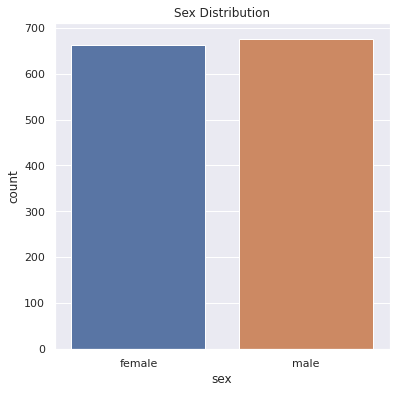

In [113]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [114]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import random

np.random.seed(1338)
age = np.random.uniform(low=0, high=80, size=1000)
charge = np.random.normal(loc=3000, scale =1000, size= 1000)
bmi = np.random.normal(loc=3000, scale = 1000, size =1000)
gender = random.choices(["female", "male"], k =1000);
df1 = pd.DataFrame({"age": age, "charge": charge, "sex": gender, "bmi": bmi})

female = df[df.sex =='female']
male = df[df.sex =='male']


In [115]:
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [116]:

fig = ff.create_distplot(hist_data =[df1.charge.values.tolist()],
                        group_labels = ["Insurance charges"],
                        bin_size=[200],colors= [' deeppink'])
fig["layout"].update(title="Distribution of Insurance charges")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



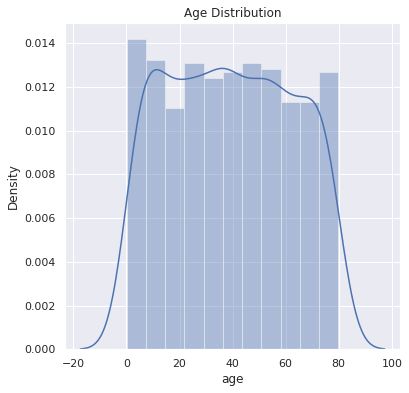

In [117]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df1['age'])
plt.title('Age Distribution')
plt.show()

In [118]:
fig = ff.create_distplot(hist_data =[df1.bmi.values.tolist()],
                        group_labels = ["BMI"],
                        bin_size=[200],colors= ['limegreen'])
fig["layout"].update(title="Distribution of BMI")
fig.show()

In [119]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


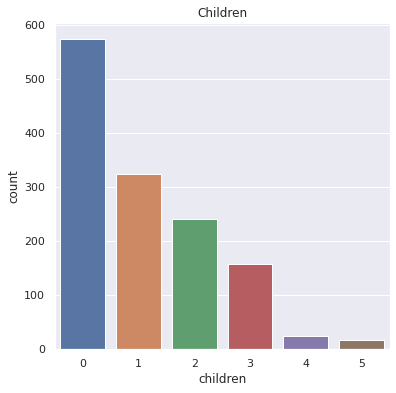

In [120]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [121]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

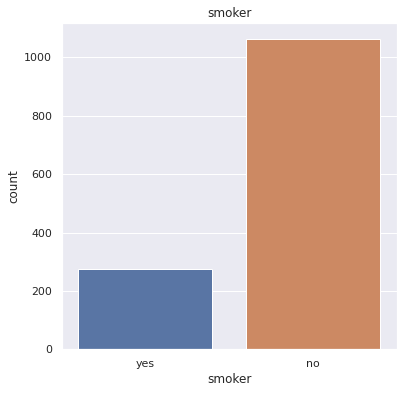

In [122]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [123]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

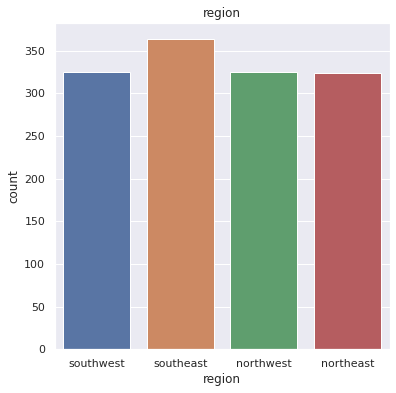

In [124]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [125]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [126]:
# encoding 
#sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 #smoker column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# region column
df.replace({'region':{'southeast':1,'southwest':2,'northeast':3,'northwest':4}}, inplace=True)

In [ ]:
#Splitting the data into  Features and Target variable

In [128]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [132]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       2
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       4
4      32    0  28.880         0       1       4
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       4
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       2
1337   61    1  29.070         0       0       4

[1338 rows x 6 columns]


In [133]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [134]:
#Splitting the dataset into Training & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training

In [135]:
#Linear Regression
# loading the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [136]:
# prediction on training data
train_prediction =linear_reg_model.predict(X_train)

In [137]:
# R squared value
r2_train = metrics.r2_score(Y_train, train_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [138]:
# prediction for test data
test_prediction =linear_reg_model.predict(X_test)

In [139]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [140]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input = np.asarray(input_data)

# reshape the array
input_data_reshaped = input.reshape(1,-1)

prediction = linear_reg_model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3547.85814921]
The insurance cost is USD  3547.858149212736


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

